In [1]:
import os
import pandas as pd
from supabase import create_client, Client
from dotenv import load_dotenv

# Завантаження змінних середовища
load_dotenv()

# Ініціалізація Supabase клієнта
url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
table_name: str = os.environ.get("SUPABASE_TABLE")
supabase: Client = create_client(url, key)

# Завантаження даних з таблиці
# Функція для завантаження всіх даних (пагінація)
def load_all_data_from_supabase(table_name: str) -> pd.DataFrame:
    """
    Завантажує всі дані з Supabase таблиці використовуючи пагінацію
    """
    all_data = []
    offset = 0
    limit = 1000  # Розмір сторінки
    
    while True:
        try:
            response = (supabase.table(table_name)
                       .select("*")
                       .range(offset, offset + limit - 1)
                       .execute())
            
            batch_data = response.data
            
            if not batch_data:  # Якщо немає більше даних
                break
                
            all_data.extend(batch_data)
            print(f"Завантажено {len(batch_data)} записів (загалом: {len(all_data)})")
            
            if len(batch_data) < limit:  # Остання сторінка
                break
                
            offset += limit
            
        except Exception as e:
            print(f"Помилка при завантаженні даних: {e}")
            break
    
    df = pd.DataFrame(all_data)
    print(f"Загалом завантажено {len(df)} записів з таблиці '{table_name}'")
    return df

# Завантаження всіх даних
traffic_data_full = load_all_data_from_supabase(table_name)
print(f"Розмір датасету: {traffic_data_full.shape}")
traffic_data_full.head()

Завантажено 1000 записів (загалом: 1000)
Завантажено 1000 записів (загалом: 2000)
Завантажено 1000 записів (загалом: 3000)
Завантажено 1000 записів (загалом: 4000)
Завантажено 1000 записів (загалом: 5000)
Завантажено 1000 записів (загалом: 6000)
Завантажено 1000 записів (загалом: 7000)
Завантажено 1000 записів (загалом: 8000)
Завантажено 1000 записів (загалом: 9000)
Завантажено 1000 записів (загалом: 10000)
Завантажено 1000 записів (загалом: 11000)
Завантажено 1000 записів (загалом: 12000)
Завантажено 1000 записів (загалом: 13000)
Завантажено 1000 записів (загалом: 14000)
Завантажено 1000 записів (загалом: 15000)
Завантажено 1000 записів (загалом: 16000)
Завантажено 1000 записів (загалом: 17000)
Завантажено 1000 записів (загалом: 18000)
Завантажено 1000 записів (загалом: 19000)
Завантажено 1000 записів (загалом: 20000)
Завантажено 1000 записів (загалом: 21000)
Завантажено 1000 записів (загалом: 22000)
Завантажено 1000 записів (загалом: 23000)
Завантажено 1000 записів (загалом: 24000)
З

,Vehicle ID,Area,X,Y,Width,Height,Time,ID,Frame ID
0,28617,256.5,188,187,33,17,2025-11-05T04:34:54,154876,777525
1,28617,299.5,191,187,43,17,2025-11-05T04:34:54,154877,777526
2,28617,219.0,201,187,38,17,2025-11-05T04:34:54,154878,777527
3,28618,241.5,0,199,25,20,2025-11-05T04:34:55,154879,777528
4,28618,401.0,0,197,37,22,2025-11-05T04:34:55,154880,777529


In [2]:
traffic_data_full.head()

,Vehicle ID,Area,X,Y,Width,Height,Time,ID,Frame ID
0,28617,256.5,188,187,33,17,2025-11-05T04:34:54,154876,777525
1,28617,299.5,191,187,43,17,2025-11-05T04:34:54,154877,777526
2,28617,219.0,201,187,38,17,2025-11-05T04:34:54,154878,777527
3,28618,241.5,0,199,25,20,2025-11-05T04:34:55,154879,777528
4,28618,401.0,0,197,37,22,2025-11-05T04:34:55,154880,777529


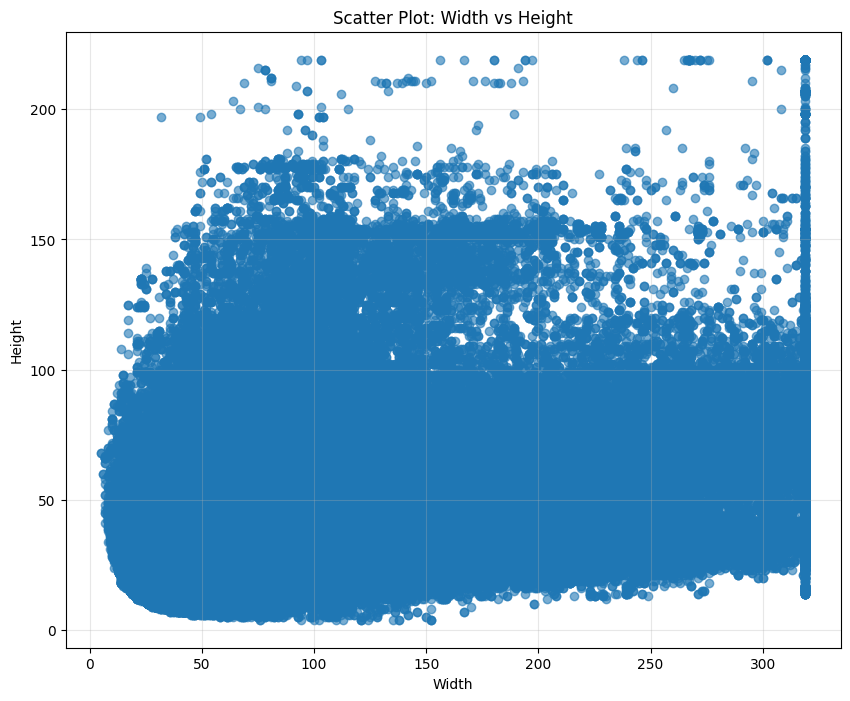

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(traffic_data_full['Width'], traffic_data_full['Height'], alpha=0.6)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot: Width vs Height')
plt.grid(True, alpha=0.3)
plt.show()